***
# Eton College Computational Physics Prize 2020
## Author: Chenyang Li
***

## 1. Introduction
***

### 1.1 Historical Searches for Exoplanets
Since antiquity, the question concerning the existence of worlds apart from our own has always been of significant theoretical interest, with views ranging from Aristotle’s rather forceful assertion that “it is clear that the earth does not move, and that it does not lie elsewhere than at the centre” to Italian philosopher Giordano Bruno’s claim that “this space we declare to be infinite [...] In it are an infinity of worlds of the same kind as our own.”

While the philosophical debate continued, it was not until Galileo’s discovery of Jupiter's moons when the possibility of the existence of exoplanets truly presented themselves to the early scientific community. Over three hundred years later, in 1992, Wolszczan and Frail announced the discovery of two rocky planets orbiting PSR B1 257+12, a pulsar in the constellation Virgo. As the result of several improvements in instrumentation and observing techniques, in the past two decades the number of exoplanets discovered has dramatically increased: as of February, 2020, over [4000](http://exoplanet.eu/catalog/) have been found (Schneider, 2020). 

### 1.2 Exoplanet Detection Methods

Several methods for the discovery of exoplanets are currently in use, with multiple proposed methods still yet to detect an exoplanet. The main difficulty arises due to the fact that exoplanets are extremely dim when compared to the parent star, making direct imaging very difficult and only applicable to a small number of cases.

#### 1.2.1 Methods Discussed in this Article

#### Radial Velocity

Clearest when the planetary system is seen side on, this method detects the Doppler shift of the spectral lines of the starlight, caused by the gravitational pull of an orbiting companion planet. The mass of the planet can be calculated from the variations in radial velocity it causes on its parent star.

#### Transits

Used exclusively for side on orbits, this method detects the periodic dip in light intensity caused by the planet passing in front of its parent star and blocking some of the emitted light, producing a light curve. Note that this event is called a transit, whereas the passage of the planet behind its parent star is called an occultation or sometimes a secondary eclipse. For a transiting object to be confirmed as a planet, its mass needs to be measured through the radial velocity method. The transit method is most sensitive to large planets with a small orbital semi-major axis such as a *Hot Jupiter*, where the probability of observing their transits is greater.

### Figure 1.A

<img src="images/methods.png" alt="Drawing" style="width: 500px;"/>
<br>

The radial velocity and transit methods. [Here](https://www.economist.com/graphic-detail/2016/08/25/how-to-find-exoplanets) is the full article. (Economist, 2016)

#### 1.2.2 Other Methods

#### Astrometry 

This refers to the accurate measurement of the positions of the star. Most effective for finding high-mass planets in wide orbits around nearby relatively low-mass stars, wobbles detected in the star's position caused by the gravitational pull of the exoplanet can be used to indirectly detect planets.

#### Gravitational Microlensing

Requiring a crowed stellar background, this method detects the magnification of a background star due to the deflection of its light by the gravitational field of a foreground planetary system acting as a gravitational lens. Whilst the parent star acts as the main lens, the orbiting planet adds a much briefer magnification effect in addition to the lensing of its host star. The microlensing technique is sensitive to down to Earth sized exoplanets, although the detection of small planets depends on the time sampling, as the smaller the planet, the shorter the microlensing event. 

#### Direct Imaging 

Detecting the light emitted or reflected from a planet itself, direct imaging only works for a minority of planets that are far enough from their parent stars so that the stellar glare can be suppressed. A chronograph or an interferometer can be used to suppress light emitted from the star. The direct imaging technique uses adaptive optics to sharpen the image of the star which is then easier to suppress, and to sharpen the image of the planet which is then easier to detect.

#### Pulsar Timing

This method detects regular anomalies in the frequency of the radio pulses of a neutron star; an Earth-like planet around a pulsar creates a detectable pulse delay of 1.2 milliseconds. As the name suggests, this method is limited to pulsars.

### Figure 1.B

<img src="images/Detection.png" alt="Drawing" style="width: 600px;"/>
<br>

A comprehensive summary of the different methods for detecting exoplanets, as well as the total number of planetary systems found per method as of 1 January 2018 (Perryman, 2018). 

## 2. Project Overview
***

### 2.1 Fundamental Aims

Inspired by the awarding of the Nobel Prize in Physics (2019) to Mayor and Queloz for the discovery of exoplanets using the radial velocity method, in this project, we aim to model a two-body exoplanet system, applying Kepler's laws to given orbital parameters in order to accurately predict the movement of both the planet and parent star. From there both the light curve and radial velocity readings will be extrapolated, using the exact analytic formulae for the eclipse of a star described by quadratic limb darkening, and Kepler's equation with the equation for radial velocity variations.

### 2.2 Flow Summary

The algorithmic flow can be summarised as follows:
   1. Select a desired binary star system.   
   2. Load the orbital elements of that desired system (see 2.3)
   3. Compute the mean anomaly from $M = \frac{2\pi}{P}(t-T)$, where $P$ is the orbital period of the planet and $T$ is the time of last passage at periaston. 
   4. Use Newton's method to solve Kepler's equation $M =E - e\sin(E)$, deriving $E$, the eccentric anomaly.
   5. From $E$ derive $d$, the side on centre-to-centre distance between the planet and star.
   6. Calculate $\nu$, the true anomaly.
   7. From $d$, integrate the unobstructed flux emitted from the parent star. 
   8. Integrate to solve for the total flux emitted, using the light intensity equation described by quadratic limb darkening (Mandel and Agol).
   9. Derive $V$, the observed radial velocity variations, from $\nu$.
   10. Repeat steps 2-9 for each timestamp of the period of the orbit, producing two arrays of results that can be plotted against the timestamp.

### 2.3 Orbital Elements 

As the parameters which are required to uniquely define a particular orbit, orbital elements are essential for mathematically modelling a Kepler orbit; note that, while sufficiently accurate for the purposes of this project, real orbits change over time due to gravitational perturbations by other objects and the effects of relativity. A Keplerian orbit is merely an idealized approximation at a given time.

Whilst there may be different ways to describe an orbit, in general the following parameters are used: 
- $t_{0}$: The time of a reference transit for each orbit.
- $a$: semi-major axis.
- $b$: impact parameters of the orbit.
- $e$: eccentricity of the orbit, describing how elongated the ellipse.
- $\omega$: argument of periapsis.
- $i$: inclination of orbit.

Note that in our simulation, the period of the orbit, and the mass and radius of both planet and star, are also used. Additionally, the longitude of the ascending node, $\Omega$, is not included in our model as it is difficult to measure and does not affect the final results.

### Figure 2.A.I
<img src="images/orbit_elements.png" alt="Orbit Elements" style="width: 500px;"/>
Diagram showing orbital elements.

### Figure 2.A.II
<img src="images/Angular_Parameters_of_Elliptical_Orbit.png" alt="Orbit Elements" style="width: 300px;"/>
<br>
(Wikipedia, 2020a)

### 2.4 Anomalies

In astronomy, *anomaly* refers to three different angles which are used to map the motion of the planet as it orbits a star; these are fundamentally linked with each other through a series of equations (Reed, 2019). An excellent source on the derivation of these is found [here.](http://www.bogan.ca/orbits/kepler/e_anomly.html)

#### 2.4.1 Mean Anomaly

This is the angle between lines drawn from the star to the periapsis and to a point moving in the orbit at a uniform rate (on a circular orbit), corresponding to the period of revolution of the planet. 
\begin{equation*}
M = \frac{2\pi}{P}(t-T) 
\end{equation*}
where $P$ is the orbital period of the planet and $T$ is the time of last passage at periaston (where the planet comes closest to the star). 

This is illustrated here:

### Figure 2.B
<img src="images/Mean_anomaly_diagram.png" alt="Mean_anomaly_diagram." style="width: 300px;"/>
"Area swept out per unit time is in grey by an object in an elliptical orbit, and an imaginary object in a circular orbit is in pink."

Note that for visual simplicity, a non-overlapping circular orbit is drawn: this circular orbit with same orbital period is not shown in true scale with this elliptical orbit. For the scale to be true for orbits of equal period, the radius of circle must equal the semi-major axis of the ellipse. (Wikipedia, 2020b) 

#### 2.4.2 Eccentric Anomaly

This is the angle $E$, between the periapsis, the centre of the ellipse, and the point $P′$ (shown in Figure 2.C), which is located by drawing a perpendicular to $CF$ passing through the planet and intersecting a circle of $C-$periapsis.

The eccentric anomaly is related to the mean anomaly through the following relationship, known as Kepler's equation: 

\begin{equation*}
M = E - e\sin{E} 
\end{equation*}

This equation is known as a transcendental function as it cannot be solved analytically; rather, it is solved numerically, using Newton's method, which consists of finding a better value at each iteration using the value previously found at the previous iteration, the expression of the function, and its derivative: $x_{n+1} = x_{n}-\frac{f(x_{n})}{f'(x_{n})}$. These two functions are given below:

\begin{align}
E(M)  & = E - e\sin{E} - M \\
E'(M) & = 1 - e\cos{E}
\end{align}

#### 2.4.3 True Anomaly

This is the angle $f$ in Figure 2.C, but is more commonly denoted as $\theta$ or $\nu$. In this study we use $\nu$.

The true anomaly can be derived from the eccentric anomaly through the following equation.

\begin{equation*}
\cos{\nu} = \frac{ \cos{E} - e }{ 1 - e\cos{E} } 
\end{equation*}

### Figure 2.C
<img src="images/Eccentric_and_True_Anomaly.png" alt="Eccentric_anomaly_diagram." style="width: 300px;"/>
(Wikipedia, 2020c)

#### 2.4.4 Code Showing Variation in Mean, Eccentric, True Anomaly
Note that the full annotated code can be found in section 3. 
<br>

<IPython.core.display.Javascript object>


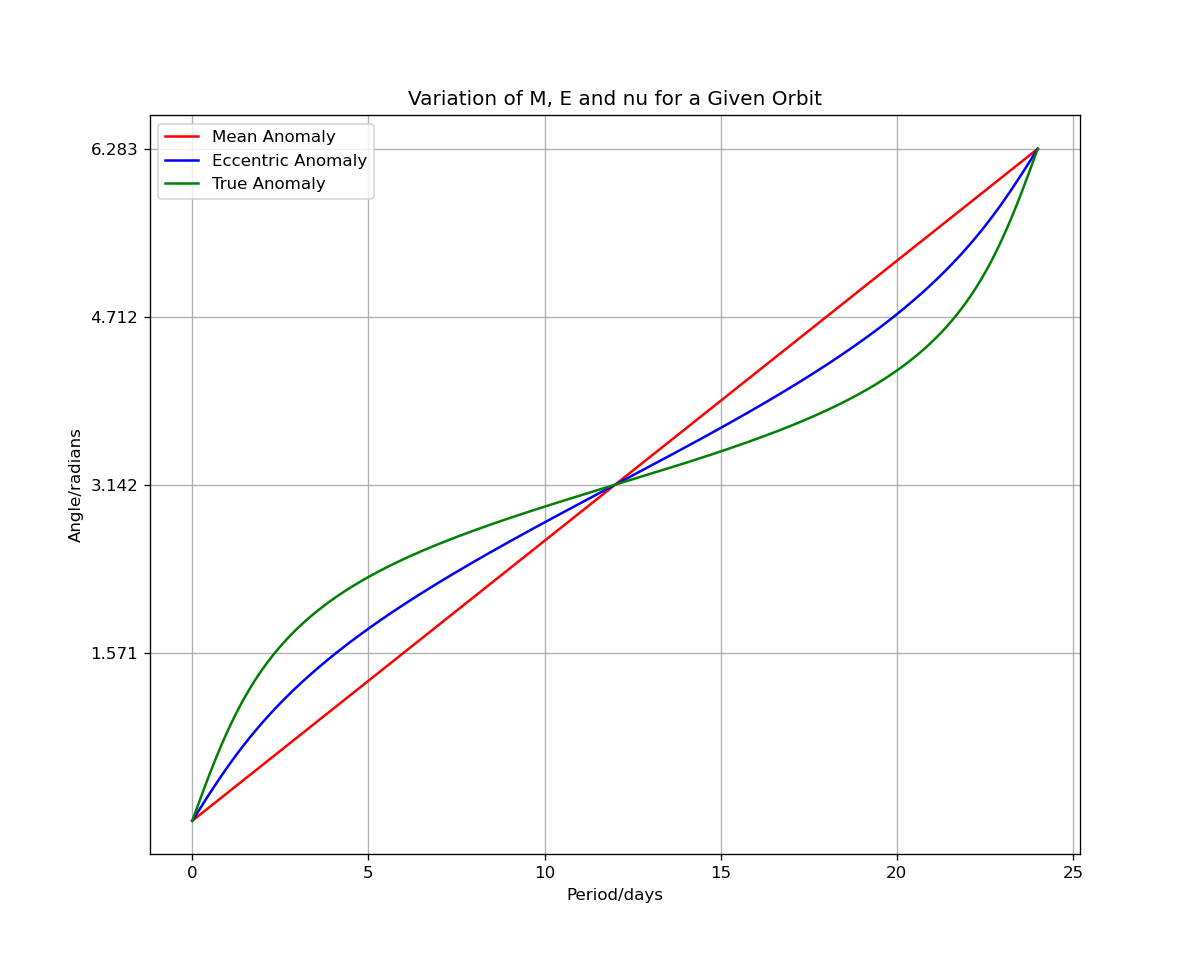

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def get_mean_anomaly(t, period): 
    return (2*np.pi) * t/period           
    
def f(e, E, M):
    return E - (e * np.sin(E)) - M

def f_prime(e, E):
    return 1 - (e * np.cos(E))

def get_eccentric_anomaly(e, M):        
    x = M # the mean anomaly is close to the eccentric anomaly and will converge quicker
    x_1 = M # initialise

    tolerance = 10**(-10) # 10-digit accuracy is desired
    epsilon = 10**(-15) # minimum divisor 
    solved = False

    while True:                    
        y = f(e, x, M)
        y_prime = f_prime(e, x)
        # don't want to divide by too small a number 
        if (abs(y_prime) >= epsilon):  
            x_1 = x - y/(y_prime)
            # if the result is within the desired tolerance
            if (abs(x_1 - x) <= tolerance): 
                solved = True
                break
            else:
                x = x_1 # update x to restart
        else:
            continue

    if solved:
        return x_1
    else:
        raise ValueError("no convergence")

def get_true_anomaly(e, E):
        cosE = np.cos(E)
        diff = cosE - e
        cosNu = diff/(1 - e * cosE)
        nu = np.arccos(cosNu)

        return nu
           
def main():
    """
    Function that graphs the variation in M, E and nu 
    as the planets orbits the star.
    
    e: eccentricity of the orbit 
    period: period of the orbit in days
    """
    sample_parameters = {"e":0.5, "period": 24}
    step = 3600
    timestamps = np.linspace(0, sample_parameters["period"], step)
    
    M_list = []; E_list = []; nu_list = [] # initialise arrays 
    
    for time in timestamps:
        M = get_mean_anomaly(time, sample_parameters["period"])           
        E = get_eccentric_anomaly(sample_parameters["e"], M)
        nu = get_true_anomaly(sample_parameters["e"], E)
        if E >= np.pi:
            nu = (2*np.pi) -nu
        
        M_list.append(M); E_list.append(E); nu_list.append(nu)
        
    figure(num=3, figsize=(10, 8), dpi=80, facecolor="w", edgecolor="b")
    
    
    plt.plot(timestamps, M_list, "r-", label="Mean Anomaly")
    plt.plot(timestamps, E_list, "b-", label="Eccentric Anomaly")
    plt.plot(timestamps, nu_list, "g-", label="True Anomaly")
    plt.title("Variation of M, E and nu for a Given Orbit")
    
    plt.xlabel("Period/days")
    plt.ylabel("Angle/radians")
    plt.yticks([np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])

    plt.legend()
    plt.grid(True)
   
    plt.show()

main()

### 2.5 The Light Curve

Predicting the light curve relies on understanding several stellar parameters, the most important of these being the formulae giving a "fast and accurate means of computing light curves using limb-darkening coefficients" (Mandel and Agol, 2002). In order to produce the normalised light curve, we need to calculate the ratio between the unobstructed and obstructed blocked flux. The parameters of the transit curve are given in the diagram below. 

The *total* duration of the transit is $T_{tot} = t_{IV} − t_{I}$; the *full* duration is $T_{full} = t_{III} − t_{II}$, the *ingress* duration is $\tau_{ing} = t_{II} − t_{I}$; the *egress* duration is $\tau_{egr} = t_{IV} − t_{III}$. (Winn, 2010)

### Figure 2.D

<img src="images/transit_flux.png" alt="Flux" style="width: 500px;"/>
<br>

Figure showing the main parameters concerning the transit of the planet, and its associated light curve. (Winn, 2010)

#### 2.5.1 Flux 

Mandel and Agol (2002) give the equations that describe the normalised observed flux, calculated based on $d$ the centre-to-centre distance between the star and the planet, which is in turn affected by the eccentric anomaly, $E$. This relationship is described as follows:

\begin{equation*}
d = a\cos{E}
\end{equation*}

Figure 2.E gives the function for a uniform light source.

### Figure 2.E

<img src="images/uniform_source.png" alt="Flux" style="width: 900px;"/>

#### 2.5.2 Limb Darkening 
This is a mathematical model that accounts for the fact that stars are significantly dimmer at the edges; using limb darkening equations, we can integrate this function for the entire surface of the star.

The intensity of the stellar output has been described by the analytic equations given by Mandel and Agol (2002).

#### Quadratic Limb Darkening 
This is the main model that we will use in this project to increase computational efficiency.

\begin{equation*}
I(r) = 1 - \gamma_{1}(1 - \mu) - \gamma_{2}(1 - \mu)^{2}
\end{equation*}

where $\mu = \sqrt{(1 - r^{2})}$ ($r$ is the normalised radial coordinate) and $0 \leqslant \mu \leqslant 1$ and $\gamma$ is a free parameter constant describing the limb darkening profile ($\gamma_{1} + \gamma_{2} < 1$).

#### Non-linear Limb Darkening 

\begin{equation*}
I(\mu) = 1 - \sum_{n = 1}^{4} c_{n}(1 - \mu^{\frac{n}{2}})
\end{equation*}

#### 2.5.3 Code Showing the Quadratic Limb Darkening Profile 

<IPython.core.display.Javascript object>


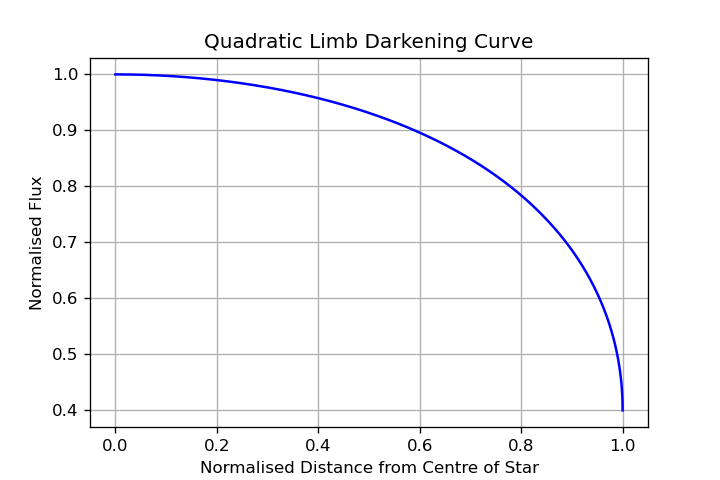

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

gamma = (0.5, 0.1) # free parameter constants describing the limb darkening profile

def intensity(r):
    mu = (1 - r**2) ** 0.5
    k = 1 - mu
    return 1 - gamma[0]*k - gamma[1]*(k**2)


figure(num=3, figsize=(6, 4), dpi=80, facecolor="w", edgecolor="b")

x = np.linspace(0, 1, 3600)
y = list(map(intensity, x))

plt.plot(x,y, color="b")
plt.title("Quadratic Limb Darkening Curve")
    
plt.xlabel("Normalised Distance from Centre of Star")
plt.ylabel("Normalised Flux")
plt.grid(True)

plt.show()

This seems reasonable. See the fully annotated code in Section 3.

#### 2.5.4 Full Transit Curve

These equations are combined with Figure 2.F to give the full transit curve:

### Figure 2.F

<img src="images/flux_eq.png" alt="Flux" style="width: 500px;"/>
<br>

### 2.6 Radial Velocity

Predicting the radial velocity also requires an accurate model of the motion of both the exoplanet and the parent star; once both the mass of the planet and star are given, and the motion of the planet can be modelled, the motion of the star can be found. The formulae used in this project relating true anomaly, $\nu$, and variations in radial velocity are derived [here](http://exoplanets.astro.yale.edu/workshop/EPRV/Bibliography_files/Radial_Velocity.pdf) in *Radial Velocity* (Lovis, 2011).

Whilst the model includes the calculation of the change in wavelength due to the Doppler effect, below in section 4 we will focus on the measurement produced for radial velocity, as this is the main focus of most academic literature (Doppler spectroscopy being the raw data measured from telescopes). It is stressed that relativistic Doppler is *not* used in this project as the increase in precision is negligible given the range of uncertainty in the initial readings.

#### 2.6.1 Radial Velocity Equation 

The equation for radial velocity used in this model is given by Lovis and Fischer (2010). 

### Figure 2.G

<img src="images/radial_velocity.png" alt="RV" style="width: 400px;"/>
<br>

From there we can derive the semi-amplitude of the radial velocity: $K$.

### Figure 2.H

<img src="images/K_star.png" alt="K_star" style="width: 450px;"/>
<br>

### 2.7 An Interlude on Units

In this model, the following units are used:
- Length: Astronomical Units (AU)
- Mass: Solar Mass
- Time: Days
- Angle: Radians

Hence, whilst some values such as $i$ (inclination) are inputted into the code in other units (e.g. degrees), these are converted in the code.  

## 3. The Exoplanet Model
***
### 3.1 Notes on the Code
In this code, we set up constants with global scope. Then, both a Planet and Star class are initialised, which are then passed into the BinarySystem class. BinarySystem includes two the main methods that can be used to output graphical results: *.transit*, which produces a light curve graph of the transit, and *.radial_velocity*, which produces a graph of radial velocity variations. Other methods and attributes are included, but these are not designed to be ran individually as they are not stand-alone functions. 

### 3.2 The Code

In [3]:
# Set-up of dependencies needed for code 

from __future__ import division
import numpy as np
from numpy.random import rand

# defining of constants 
pi = np.pi
N_stepsize = 3600 # general step size for computations (integration and differention from 0 to 1)
SMALL_NUM = 0.1/N_stepsize
gamma = (0.5, 0.1) # free parameter constants describing the limb darkening profile
V_0 = 0 # mean radial velocity of the star-planet centre of mass

g_constant_SI = 6.6743*(10**-11) # here g is defined in m**3 * kg**-1 * s**-2
k = (1.495978707 * (10**11))**3 / (1.988478*(10**30) * (24 * 60 * 60)**2) # k is a dimensionless conversion factor
g_constant = g_constant_SI/k # here g is defined in AU**3 * solar_mass**-1 * days**-2

c_constant_SI = 299792458 # here c is defined in m/s
kappa = (24 * 60 * 60)/ (1.495978707 * (10**11)) # kappa is a dimensionless conversion factor
c_constant = c_constant_SI/kappa # here c is defined in AU/day


DEBUG = False


"""
The dictionary 'convert' below converts from the units
specified in the keys to the units below

length -> AU
mass -> solar_mass
time -> days
angle -> radians
"""

# ratio of 1:units

convert = {
    "solar_radius": 0.00465047,
    "solar_mass": 1,
    "jovian_radius": 0.000477895, 
    "jovian_mass": 0.0009547919, 
    "AU": 1, 
    "years": 365.25, 
    "degrees": 180/pi, 
    "n/a": 1
}


In [4]:
# Set-up of Star and Planet classes

class Star:
    """
    Star Object
    """
    def __init__(self, mass, radius, earth_distance=1):
        """
        Args:
            mass: solar_mass
            radius: solar_radius
            earth_distance: distance from the earth in light years
            spectral_line: average wavelength of the spectral line.
        Initialises:
            raw_mass: solar_mass
            raw_radius: solar_radius
            mass: solar_mass
            radius: AU
        """
        self.raw_mass = mass
        self.raw_radius = radius
        self.mass = mass * convert["solar_mass"]
        self.radius = radius * convert["solar_radius"]
        self.earth_distance = earth_distance
        self.spectral_line = 1
        
class Planet:
    """
    Planet Object
    """
    def __init__(self, mass, radius, t0, a, b, e, period, w, incl):
        """
        Args:
            mass: jovian_mass
            radius: jovian_radius
            t0: The time of a reference transit for each orbit in days.
            a: semi-major axis in AU
            b: impact parameters of the orbits.
            e: eccentricities of the orbits. MUST BE : 0 <= e < 1.
            period: orbital period of the planet in days.
            w: argument of periapsis in degrees
            incl: inclination of orbit in degrees.
        
        Initialises:
            raw_mass: jovian_mass
            raw_radius: jovian_radius
            mass: solar_mass
            radius: AU
            raw_w: argument of periapsis in degrees.
            w: argument of periapsis in radians.
            raw_incl: inclination of orbit in degrees.
            incl: inclination of orbit in radians.
        """
        self.raw_mass = mass
        self.raw_radius = radius
        self.mass = mass * convert["jovian_mass"]
        self.radius = radius * convert["jovian_radius"]
        self.t0 = t0
        self.a = a
        self.b = b
        self.e = e
        self.period = period
        self.raw_incl = w * convert["degrees"]
        self.w = w
        self.raw_incl = incl
        self.incl = incl * convert["degrees"]  

In [5]:
# Set-up of main class: a Keplerian BinarySystem

class BinarySystem:
    """
    A system of two bodies on Keplerian orbits around a common centre
    
    Init:
        Star:
            - mass: Solar_mass
            - radius: Solar_radius
            - earth_distance: distance from the earth in light years
            - spectral_line: average wavelength of the spectral line. 
        Planet: 
            - mass: Jovian_mass
            - radius: Jovian_radius
            - t0: The time of a reference transit for each orbit in days.
            - a: semi-major axis in AU
            - b: impact parameters of the orbits.
            - e: eccentricities of the orbits. MUST BE : 0 <= e < 1.
            - period: orbital period of the planet in days.
            - w: argument of periapsis in degrees
            - incl: inclination of orbit in degrees.   
    """
    
    def __init__(self, star_object, planet_object):
        self.s = star_object
        self.p = planet_object

        
    def get_mean_anomaly(self, t):
        """
        Function that produces equally spaced out 
        timestamps of the mean anomaly.
        Args:
            n: arbitrary value we would like to divide P into
        Returns:
            M: mean anomaly in radians
        """ 
        return (2*pi) * t/ self.p.period
           
        
    def f(self, E, M):
        """
        Kepler's Equation: M = E - e*sin(E)
        
        Equation that describes eccentric anomaly when given mean anomaly
        Args:
            M: mean anomaly in radians
        """
        return E - (self.p.e * np.sin(E)) - M
        
    
    def f_prime(self, E):
        """
        Derivative of f(x)
        """
        return 1 - (self.p.e * np.cos(E))
    
    
    def get_eccentric_anomaly(self, M):
        """
        Newton's Method
    
        Calculates the roots of a function given the derivative
        """         
        x = M # the mean anomaly is close to the eccentric anomaly and will converge quicker
        x_1 = M
        
        tolerance = 10**(-10) # 10-digit accuracy is desired
        epsilon = 10**(-15) # minimum divisor 
        solved = False

        while True:                    
            y = self.f(x, M)
            y_prime = self.f_prime(x)
            # don't want to divide by too small a number 
            if (abs(y_prime) >= epsilon):  
                x_1 = x - y/(y_prime)
                # if the result is within the desired tolerance
                if (abs(x_1 - x) <= tolerance): 
                    solved = True
                    break
                else:
                    x = x_1 # update x to restart
            else:
                continue

        if solved:
            return x_1
        else:
            raise ValueError("no convergence")
    
    
    def get_true_anomaly(self, E):
        """
        Function that calculates the true anomaly based on the eccentric anomaly
        Args:
            E: eccentric anomaly
        Returns: 
            nu: true anomaly 
        """
        cosE = np.cos(E)
        diff = cosE - self.p.e
        cosNu = diff/(1 - self.p.e*cosE)
        nu = np.arccos(cosNu)

        return nu
        
    def get_d(self, E):
        """
        Kepler's 1st law defines the equation of an ellipse.
        Applied to exoplanets, the following function is given to 
        calculate the distance between the star and planet in the orbital plane.
        Args:
            E: eccentric anomaly
        Returns:
            d: star-planet distance        
        """
        return self.p.a * np.cos(E)
    
    def get_d_from_nu(self, nu):
        """
        Kepler's 1st law defines the equation of an ellipse.
        Applied to exoplanets, the following function is given to 
        calculate the distance between the star and planet in the projection
        into the line of intersection between the orbital plane and the reference plane.
        Args:
            nu: true anomaly
        Returns:
            d: star-planet distance        
        """
        ps_dis = (self.p.a * (1 - self.p.e ** 2)) / (1 + self.p.e * np.cos(nu))
        ps_dis = ps_dis * np.cos( self.p.w - nu )
        return ps_dis
    
        
    def intensity(self, r):
        """
        Quadratic limb darkening
        
        Equation that describes normal light intensity of the star
        Args:
            r: normalised radial coordinate MUST BE 0 <= r <= 1
            gamma: free parameter constants describing the limb darkening profile (see top)
        """
        mu = (1 - r**2) ** 0.5
        k = 1 - mu
        return 1 - gamma[0]*k - gamma[1]*(k**2)
    
    
    def total_flux(self, n=N_stepsize):
        """
        Function that calculates the total light
        by the finding the definite integral from 0 to 1
        Args:
            n: arbitrary value we would like to divide P into
        """ 
        deltas = np.linspace(0.0, 1.0, n)
        total = 0 
        for step in deltas:
            total += step * self.intensity(step)
        return (2*total)/n
    
    def obstructed_unobstructed_ratio(self, p, z):
        """
        Equation that describes transit light intensity as given in 
        'Analytic Light Curves For Planetary Transit Searches'
        (Mandel1 and Agoll, 2002)
        Args:
            d: center-to-center distance between the two bodies
            z = d/self.s.radius
            p = self.p.radius/self.s.radius
        """
        lmbda = 0 # initialise
        
        # planet is not in transit
        if (1+p) < z:
            lmbda = 0
        # transit has occurred: planet remains on edge of star
        elif abs(1-p) < z and z <= (1+p):
            arck0 = (p ** 2 + z ** 2 - 1) / (2 * p * z)
            if arck0 > 1:
                arck0 = 1

            if arck0 < -1:
                arck0 = -1

            arck1 = (1 - p ** 2 + z ** 2) / (2 * z)
            if arck1 > 1:
                arck1 = 1

            if arck1 < -1:
                arck1 = -1

            k = (np.arccos(arck0), np.arccos(arck1))
            lmbda = (1 / pi) * (k[0] * (p ** 2) + k[1] - ((4 * (z ** 2) - (1 + z ** 2 - p ** 2) ** 2) / 4) ** 0.5)

        # transit has occurred: planet completely covers star
        elif z <= (1-p):
            lmbda = p**2
        # perceived planet radius is larger than star radius
        elif z <= (p-1):
            lmbda = 1
        else: 
            raise ValueError("d (center-to-center distance between the two bodies) is incorrect")
            
        return 1 - lmbda
        
    
    def unobstructed_flux(self, d, n=N_stepsize):
        """
        Equation that describes transit light intensity as given in 
        'Analytic Light Curves For Planetary Transit Searches'
        (Mandel1 and Agoll, 2002)
        Args:
            d: center-to-center distance between the two bodies
        """
        z = d/self.s.radius
        p = self.p.radius/self.s.radius

        # partial differentiation from 0 to 1 
        deltas = np.linspace(0, 1, n)
        g = []
        for step in deltas:
            # forms a list of outputs for ob_unob_ration function; g(x)

            if step < SMALL_NUM:
                step = SMALL_NUM

            g.append(self.obstructed_unobstructed_ratio(p/step, z/step) * (step**2))
        
        diff = []
        for i in range(1,n):
            diff.append((g[i] - g[i-1])*N_stepsize)
        diff.append(diff[n-2]) # set the last value to be the same as the one before
        
        total = 0 
        for i, step in enumerate(deltas, start=0):
            # definite integral from 0 to 1
            total += self.intensity(step) * diff[i]
            
        return total/n
    
    def transit(self):
        """
        MAIN FUNCTION 1: TRANSIT METHOD
        """
        light_curve = []        
        
        total_flux = self.total_flux()
        
        timestamps = np.linspace(0, self.p.period, N_stepsize)
        for time in timestamps:
            M = self.get_mean_anomaly(time) # mean anomaly            
            E = self.get_eccentric_anomaly(M) # eccentric anomaly
            nu = self.get_true_anomaly(E)
            if E >= pi:
                # using this throws up an unusual error: pending solution
                #nu = 2*pi - nu
                pass
        
            distance = np.abs(self.get_d_from_nu(nu))
            unobstructed_flux = self.unobstructed_flux(distance)
           
            flux = unobstructed_flux/total_flux
            
            # numerical methods such as integration introduce anomalies in our results
            # as these are only an approximation of the "true" result
            if flux > 1:
            # here, abnormal results are normalised to 1
                flux = 1
            light_curve.append(flux)
            
        return {"timestamps":timestamps, "light_curve":light_curve}
        

    def get_K_star(self):
        """
        Function that calculates K, the velocity semi-amplitude
        """
        omega_const = 28.4329 # (m/s) unit constant
        
        a = omega_const/((1 - (self.p.e)**2)**0.5)
        b = self.p.raw_mass * np.sin(self.p.incl)
        c = (self.s.mass + self.p.mass)**(-2/3)
        d = (self.p.period)**(-1/3)
        
        K_star = a * b * c * d
        
        return K_star
    
    def doppler_shift(self, V):
        """
        Function that predicts that observed Doppler shift due 
        to changes in radial velocity. Note the relativistic Doppler
        shift equation is NOT used here as the increase in precision 
        is negligible given the uncertainty in the initial readings.
        Args:
            V: Radial velocity
        Returns:
            wavelength: the new wavelength due to the Doppler effect
        """
        return self.s.spectral_line * (1 - (V/c_constant))
        
        
    
    def radial_velocity(self):
        """
        MAIN FUNCTION 2: RADIAL VELOCITY METHOD
        
        Equation describing radial velocity variations, V, of a star due to an orbiting plane 
        """
        SI_switch = {"AU": 1.49598*(10**13), "solar_mass":1.98847*(10**30)}
        
        radial_velocity = []
        wavelength = []
    
        K_star = self.get_K_star()
        #K_star = 0.00015836375
        
        w_star = self.p.w + pi
        a_star = ((self.p.mass)/(self.p.mass + self.s.mass)) * self.p.a  
        
        
        factors = np.zeros(3)
        factors[0] = ( (g_constant)/(((self.s.mass + self.p.mass)) * a_star * (1 - (self.p.e)**2 )) )**0.5
        factors[1] = self.p.mass * np.sin(self.p.incl)
        
        
        timestamps = np.linspace(0, self.p.period, N_stepsize)
        for time in timestamps:
            M = self.get_mean_anomaly(time) # mean anomaly            
            E = self.get_eccentric_anomaly(M) # eccentric anomaly            
            nu = self.get_true_anomaly(E) # true anomaly
            if E >= pi:
                nu = 2*pi - nu
            nu_star = nu + pi
            
            # the only section in the equation for radial velocity that varies according to nu
            factors[2] = np.cos(self.p.w + nu_star) + (self.p.e * np.cos(self.p.w))
            
            V = 1
            for factor in factors:
                V *= factor
            
            radial_velocity.append(V)
        
            lmbda = self.doppler_shift(V)
            wavelength.append(lmbda) 
        
        return {"timestamps": timestamps, "radial_velocity": radial_velocity, "wavelength": wavelength}

## 4. Data Analysis
***
Having used the code to produce the simulated light curves and radial velocity graphs, here we will test the code against real data observed by the Keck and Subaru telescopes (for the planet HD 17156b), and the Trans-Atlantic Exoplanet Survey at the Palomar and Lowell Observatories (TrES-3b). 

### 4.1 HD 17156
Visible with good binoculars, HD 17156 is a yellow subgiant star in the constellation of Cassiopeia approximately 255 light-years away; discovered in 2007 by Fisher et al., HD 17156b is a relatively cool Hot Jupiter planet slightly smaller than Jupiter. Below is a table of all the initial parameters for the HD 17156 system (Nutzman et al., 2010).

### Table 4.I
<img src="images/HD_17156.png" alt="Table" style="width: 650px;"/>

In [6]:
""" 
INITIAL PARAMETERS FOR HD 17156
"""

HD_17156 = Star(1.275, 1.508)
HD_17156b = Planet(mass=3.191,
                   radius=1.095,
                   t0=2454884.028105,
                   a=0.1589,
                   b=0.477,
                   e=0.6768,
                   period=21.2163979,
                   w=121.71,
                   incl=86.49)


HD_17156_system = BinarySystem(HD_17156, HD_17156b)

#### 4.1.1 Transit

<IPython.core.display.Javascript object>


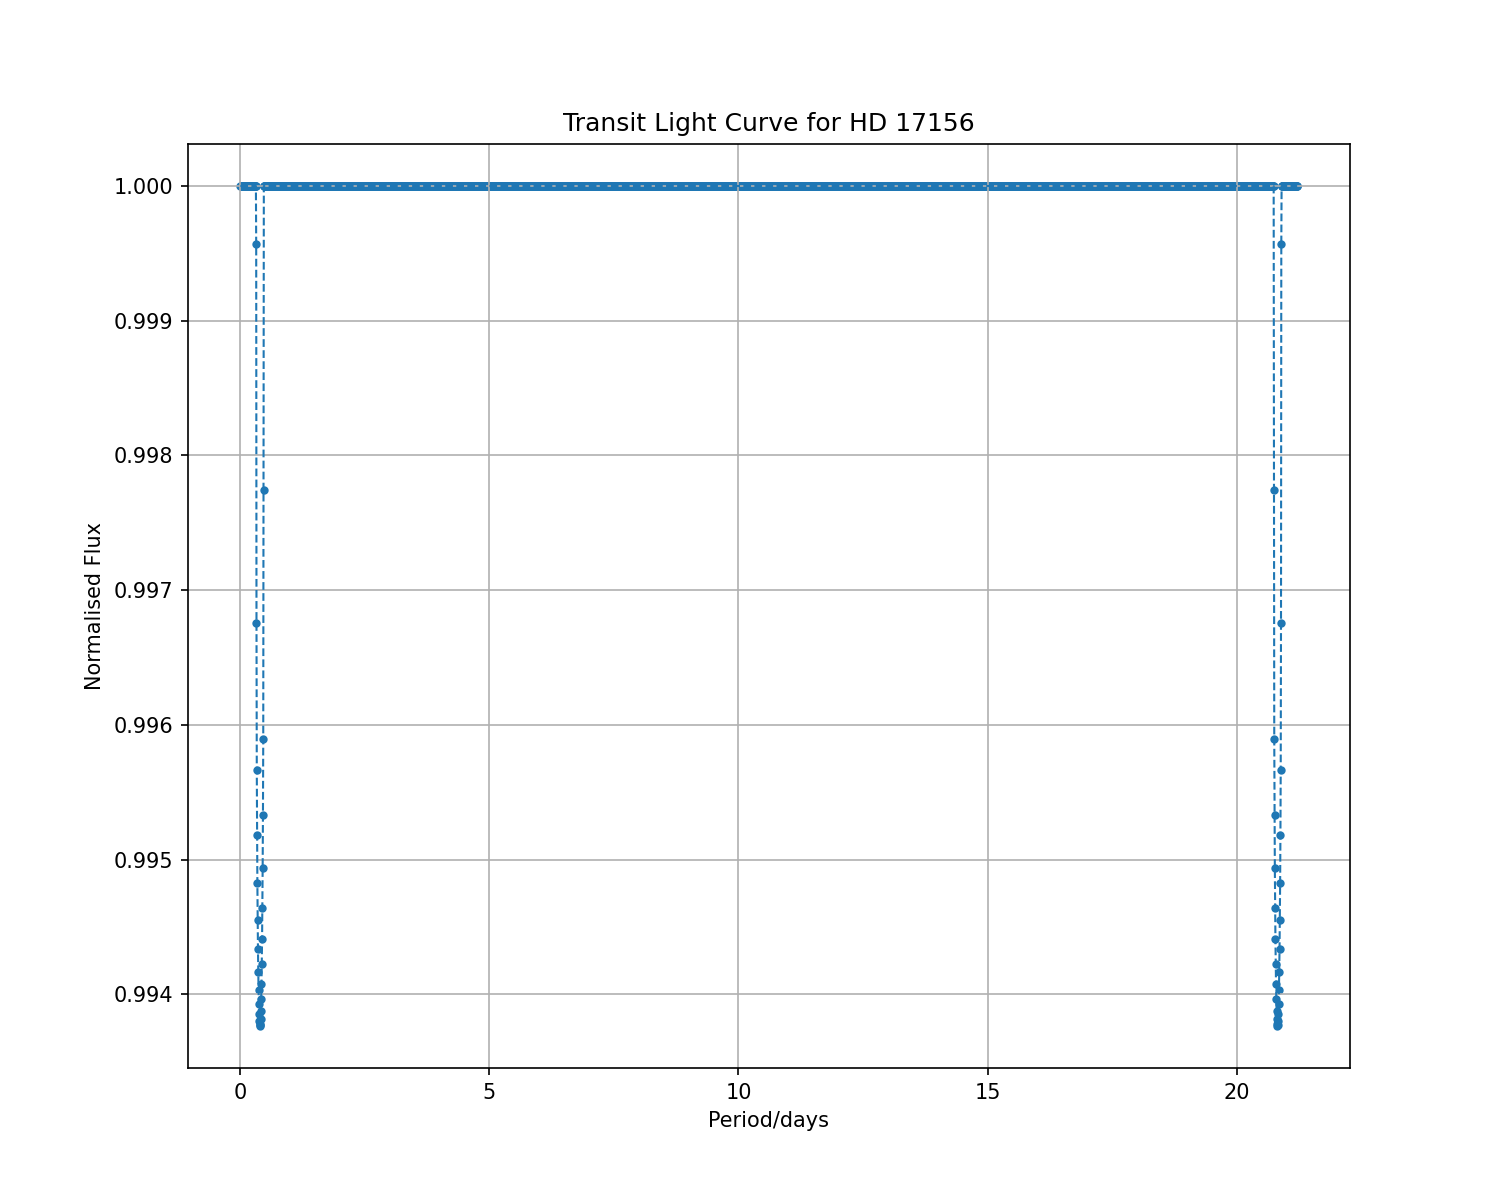

In [7]:
# Plotting Dependencies 
%matplotlib notebook
import matplotlib.pyplot as plt
data = HD_17156_system.transit()

plt.figure(figsize=(10, 8))
plt.scatter(data["timestamps"], data["light_curve"], marker=".")

line = plt.plot(data["timestamps"], data["light_curve"])
plt.setp(line, linewidth=1, linestyle="--")

plt.title("Transit Light Curve for HD 17156")
    
plt.xlabel("Period/days")
plt.ylabel("Normalised Flux")
plt.grid(True)
plt.show()

Note: the graph above is interactive if ran individually.

### Figure 4.A

<img src="images/light_curve.png" alt="Flux" style="width: 500px;"/>
<br>

Figure showing the light curve of HD 17156 measured by Nutzman et al. (2010)

#### Observations

When compared to the light curve measured by Nutzmann et al., we note that the light curve we produce is very similar: it can be observed that the total, full and ingress/egress duration of the transit (see 2.5) is almost identical- around 3 hours for the full transit time- when we convert period from days to hours. The depth of the transit curve, $\delta$, is also concurrent with the measured results, just under 0.994.

We note that the secondary transit, or the occulatory transit (when the planet dips behind the star, causing less starlight to be reflected), is not shown: this suggests that there is a simplification or mistake in our function for the flux of a uniform stellar source.

#### 4.1.2 Radial Velocity

<IPython.core.display.Javascript object>


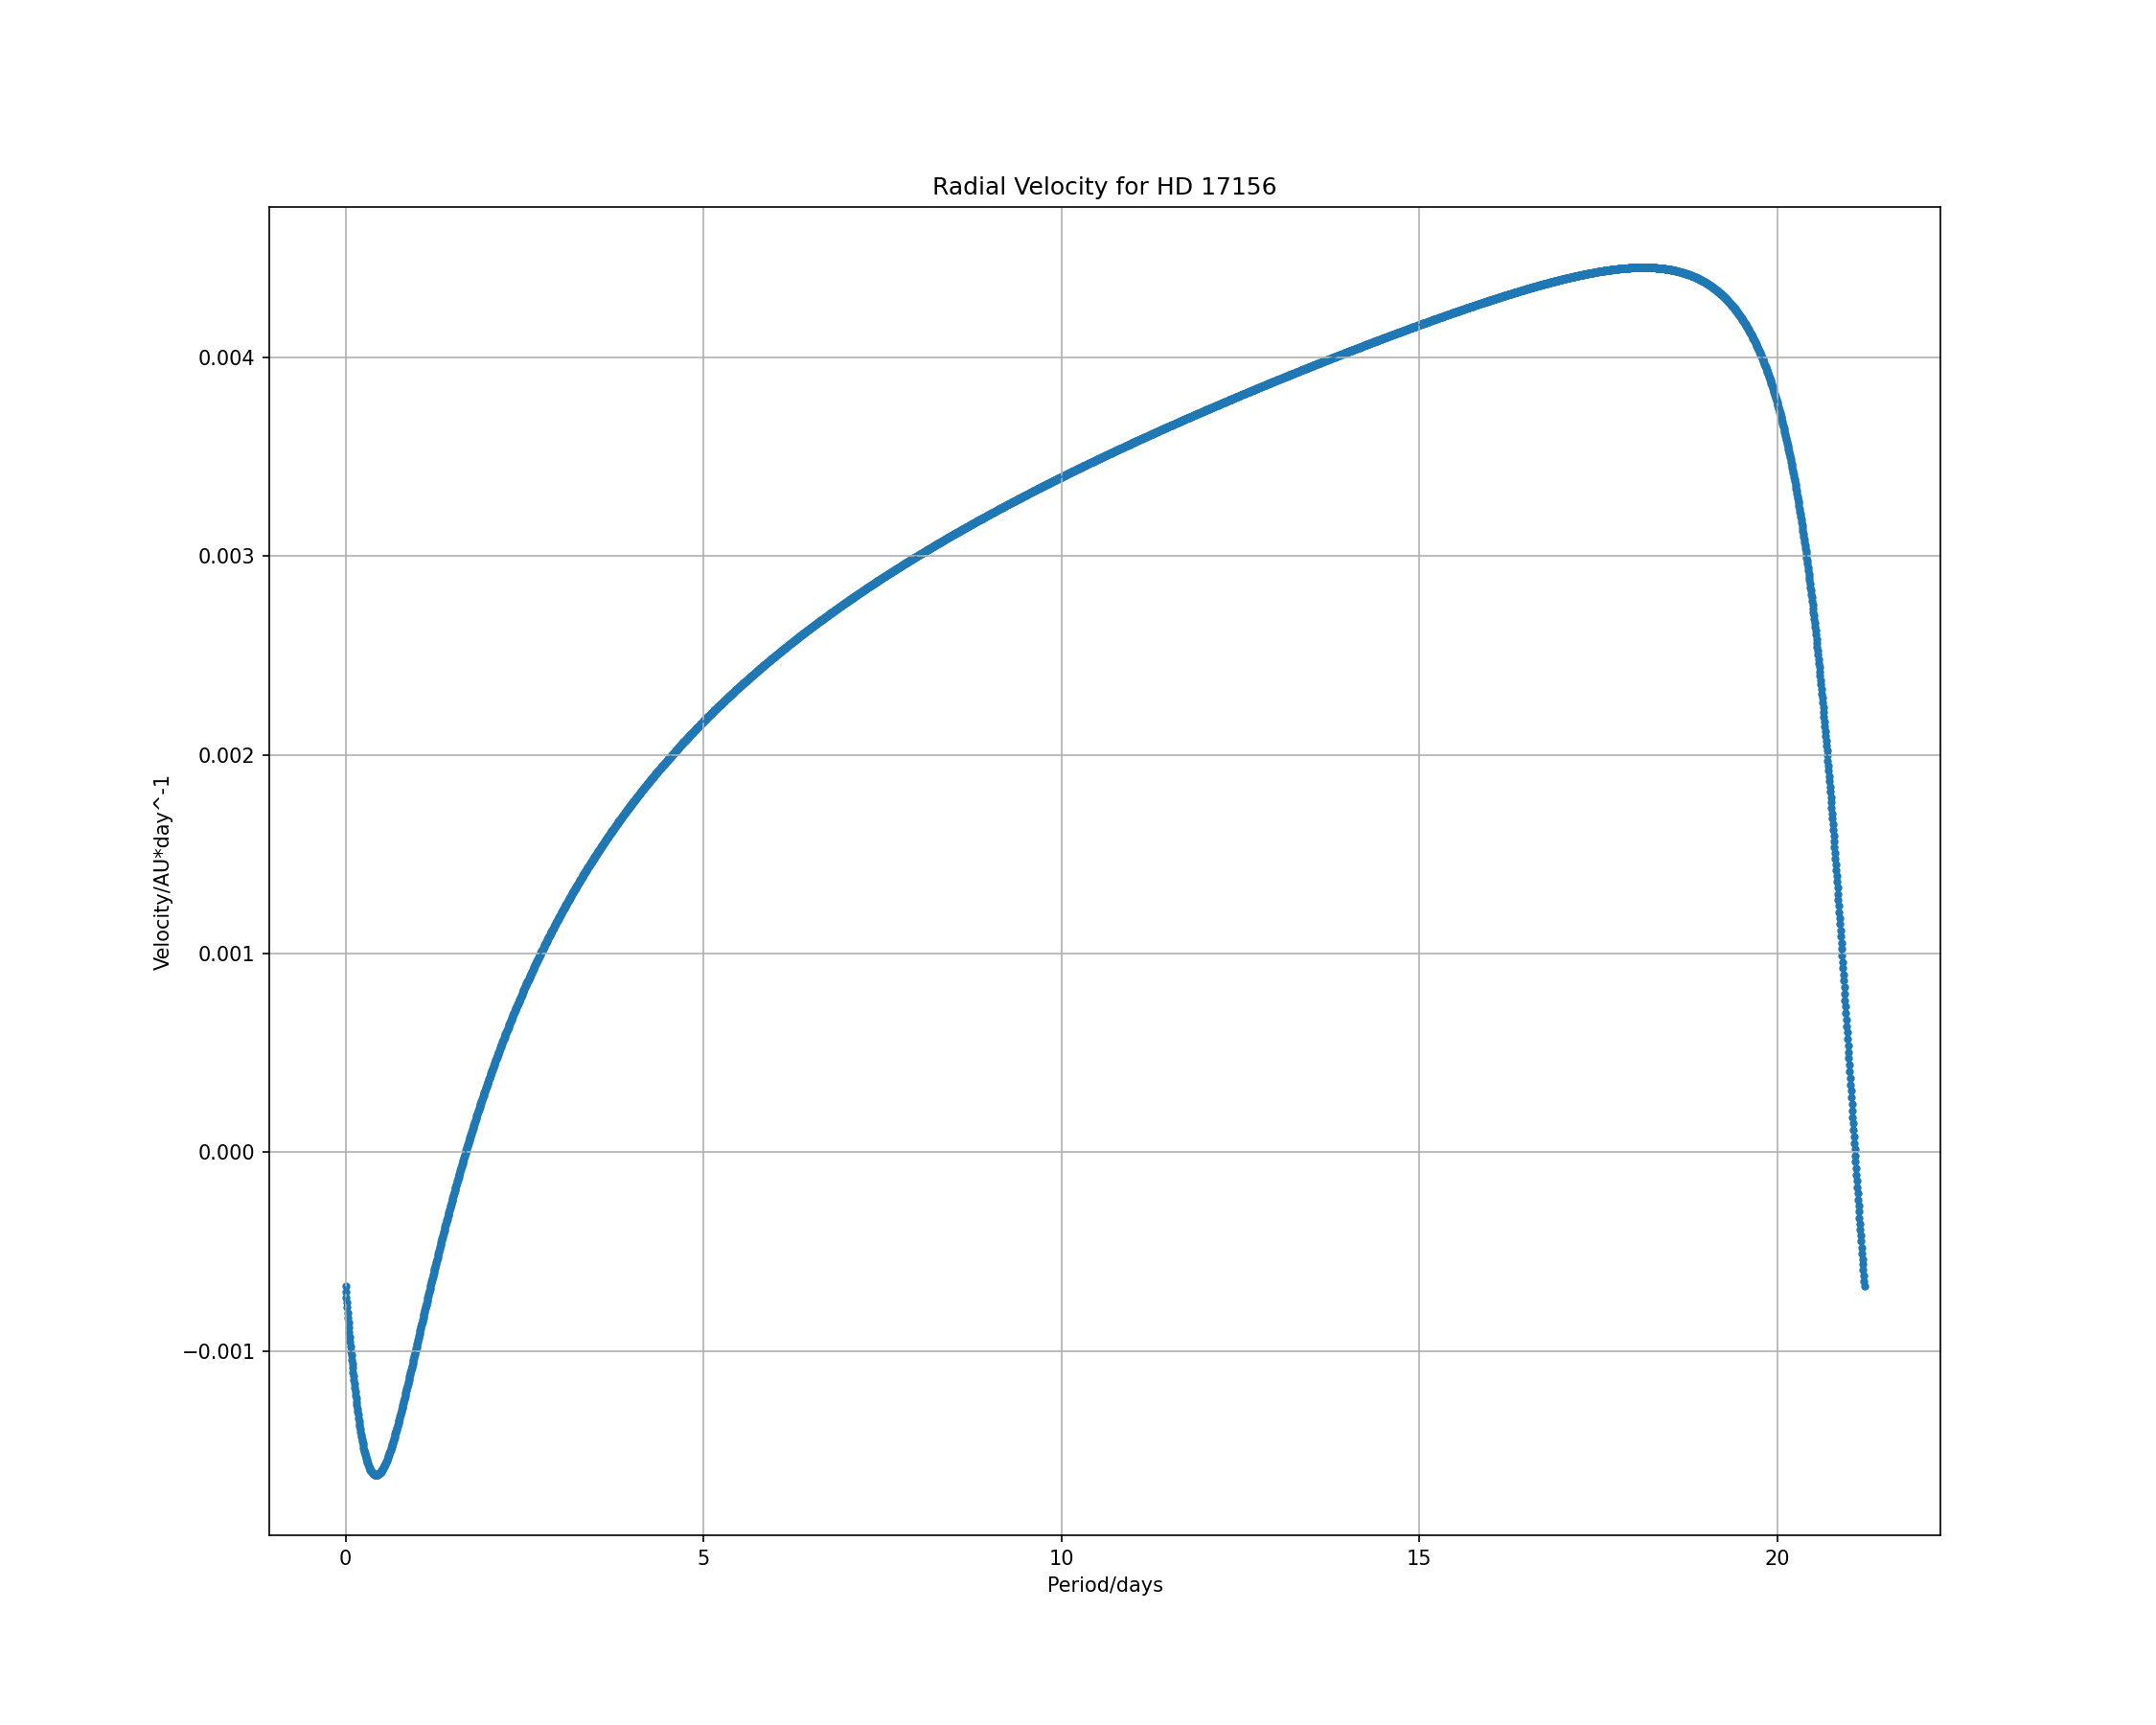

In [8]:
# Plotting Dependencies 
%matplotlib notebook
import matplotlib.pyplot as plt

data = HD_17156_system.radial_velocity()

plt.figure(figsize=(10, 8))
plt.scatter(data["timestamps"], data["radial_velocity"], marker = ".")

line = plt.plot(data["timestamps"], data["radial_velocity"])
plt.setp(line, linewidth=1, linestyle="--")

plt.title("Radial Velocity for HD 17156")
    
plt.xlabel("Period/days")
plt.ylabel("Velocity/AU*day^-1")
plt.grid(True)
plt.show()

Note: the graph above is interactive if ran individually.

### Figure 4.B

<img src="images/radial_v_graph.png" alt="Radial velocity" style="width: 1000px;"/>
<br>

<em>Left</em>: Radial velocities for HD 17156 from the Keck Observatory (<em>diamonds</em>) and Subaru Observatory (<em>filled circles</em>) accounting for uncertainties caused by photospheric jitter. <em>Right</em>: Keck velocities only. Although the phase coverage misses periastron, the Keck velocities alone confirm high eccentricity in HD 17156b. Fisher et al. (2007).

#### Observations

We note that our radial velocity variations are 0.6 of the orbital phase out with Fisher's results; otherwise the results on the graph seem to be of similar proportion and shape. Once converted, the semi-amplitude of our graph, $K$, is concurrent with the results above. 

***
### 4.2 TrES-3
Orbiting the star GSC 03089-00929, 760 light-years away in the constellation of Hercules, TrES-3b is an extrasolar planet that has an orbital period of just 31 hours and has nearly twice the mass of Jupiter. Below is a table of all the initial parameters for TrES-3 measured by Sozzetti et al. (2009).

### Table 4.II

<table><tr><td><img src="images/TrES-3_star.png" alt="System Parameters for TrES-3" style="width: 400px;"></td><td><img src="images/TrES-3.png" alt="System Parameters for TrES-3" style="width: 400px;"></td></tr></table>



In [9]:
""" 
INITIAL PARAMETERS FOR TrES-3
"""

TrES_3 = Star(0.928, 0.829)
TrES_3b = Planet(mass=1.910,
                   radius=1.336,
                   t0=2454532.04939,
                   a=0.02282,
                   b=0.840,
                   e=0,
                   period=1.306186581,
                   w=0,
                   incl=81.85)



TrES_3_system = BinarySystem(TrES_3, TrES_3b)

#### 4.2.1 Transit

<IPython.core.display.Javascript object>


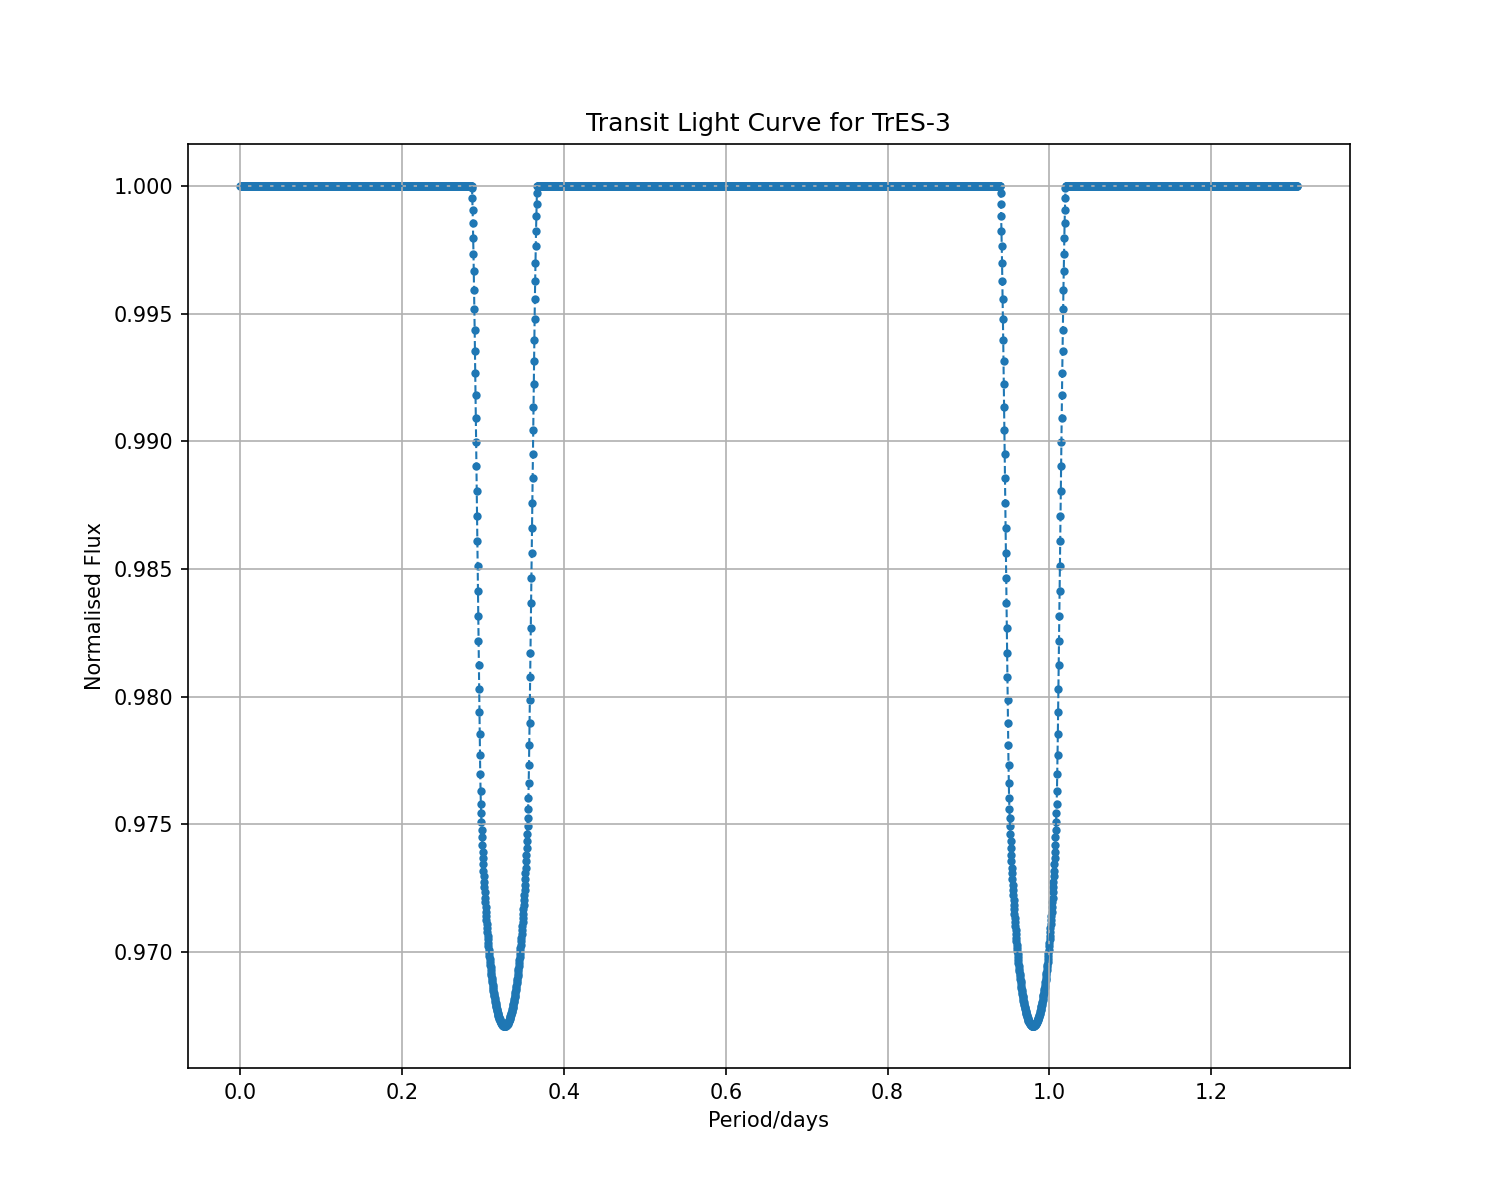

In [10]:
# Plotting Dependencies 
%matplotlib notebook
import matplotlib.pyplot as plt

data = TrES_3_system.transit()

plt.figure(figsize=(10, 8))
plt.scatter(data["timestamps"], data["light_curve"], marker=".")

line = plt.plot(data["timestamps"], data["light_curve"])
plt.setp(line, linewidth=1, linestyle="--")

plt.title("Transit Light Curve for TrES-3")
    
plt.xlabel("Period/days")
plt.ylabel("Normalised Flux")
plt.grid(True)
plt.show()

Note: the graph above is interactive if ran individually.

### Figure 4.C

<img src="images/TrE-S_light_curve.png" alt="Light curve" style="width: 550px;"/>
<br>
The transit light curve as measured by Christiansen et al. (2007). <em>Upper panel</em>: The seven TrES-3 transits, phase-folded and binned in two-minute intervals. The solid line is the best-fit transit model. <em>Lower panel</em>: the residuals when the best-fit model is subtracted from the data. 

#### Observations

As regards to the total, full and ingress/egress duration of the transit (see 2.6), we note that our model produces results that are fairly accurate. $\delta$, however, seems to be slightly too large in our calculations- around 0.968 as opposed to 0.976 as measured by Christiansen et al.- which suggests that the input data has fairly large degrees of uncertainty.

#### 4.2.2 Radial Velocity

<IPython.core.display.Javascript object>


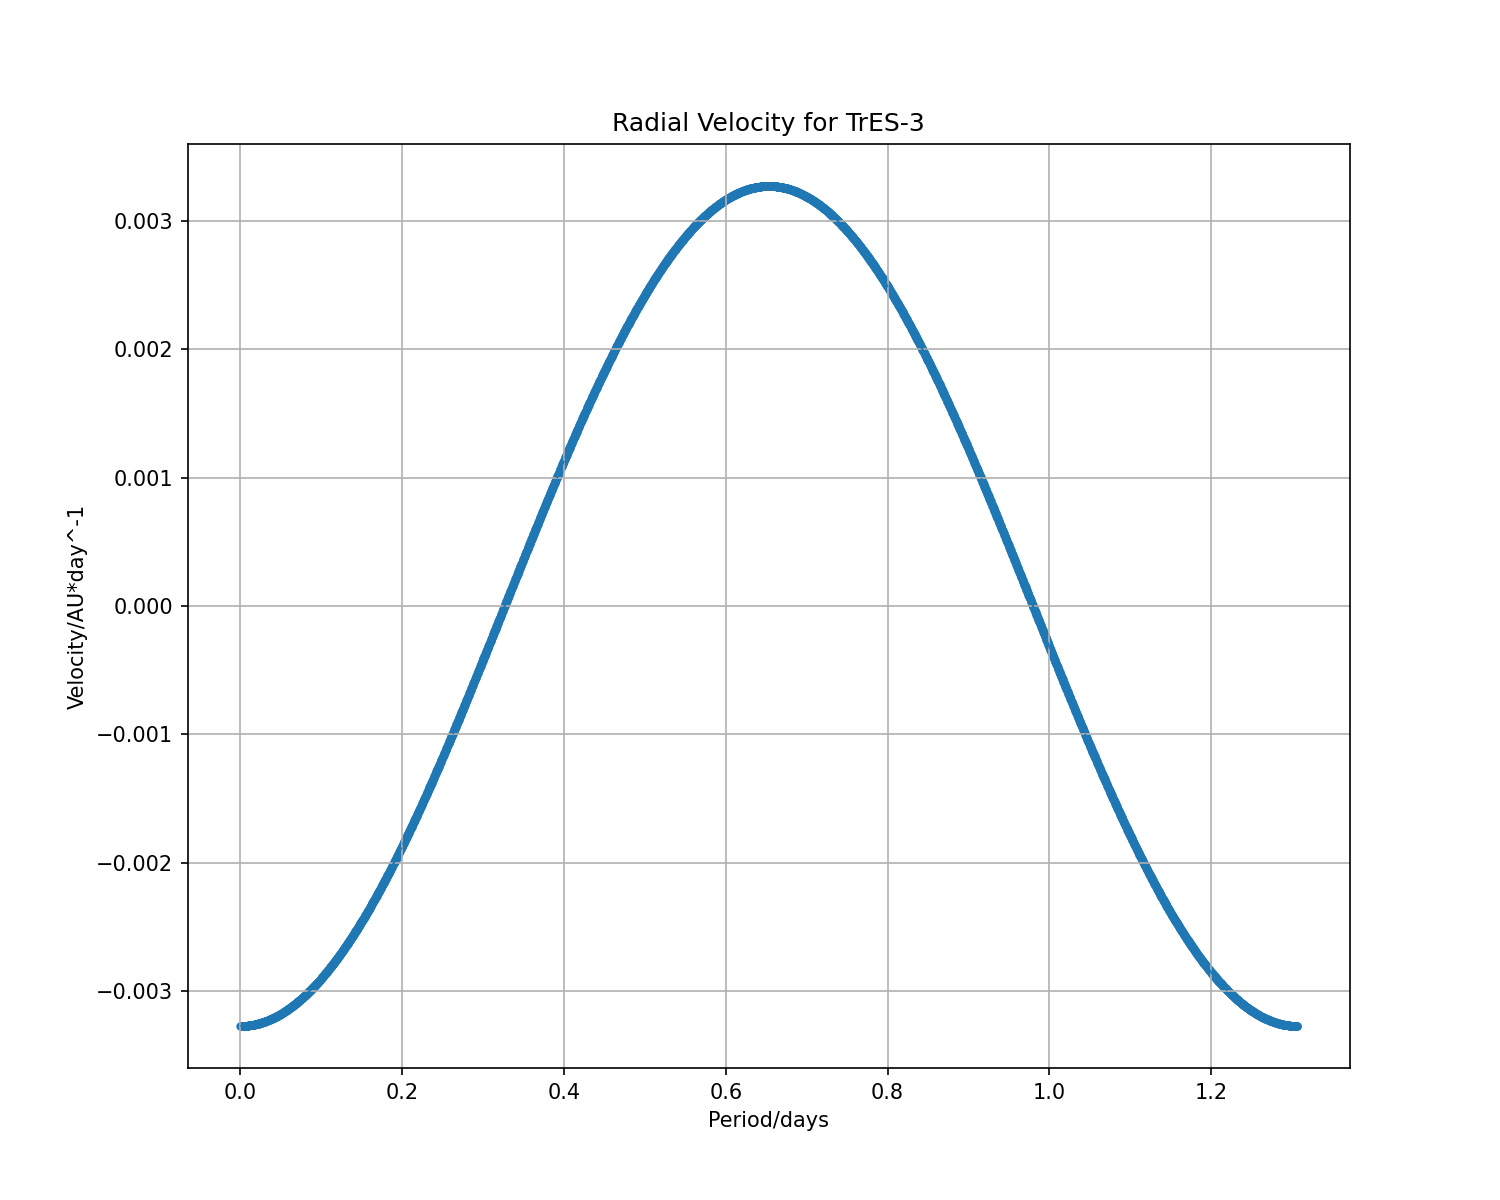

In [11]:
# Plotting Dependencies 
%matplotlib notebook
import matplotlib.pyplot as plt

data = TrES_3_system.radial_velocity()

plt.figure(figsize=(10, 8))
plt.scatter(data["timestamps"], data["radial_velocity"], marker = ".")

line = plt.plot(data["timestamps"], data["radial_velocity"])
plt.setp(line, linewidth=1, linestyle="--")

plt.title("Radial Velocity for TrES-3")
    
plt.xlabel("Period/days")
plt.ylabel("Velocity/AU*day^-1")

plt.grid(True)
plt.show()

Note: the graph above is interactive if ran individually.

### Figure 4.D

<img src="images/TrE-S_radial_velocity.png" alt="Radial velocity" style="width: 500px;"/>
<br>
<em>Top</em>: Radial velocity observations of TrES-3 obtained with Keck/HIRES using a $I_{2}$ cell, shown relative to the centre of mass. The best-fit model (<em>solid line</em>) is overplotted. <em>Middle</em>: Residuals from the best-fit model to the radial velocities. <em>Bottom</em>: Bisector spans shifted to a median of zero, for each of the iodine exposures as well as for the template (which is shown as the additional data point at phase 0.937). O'Donovan et al. (2007).

#### Observations

A smooth curve: the shape and size of our results seem to be accurate. We note that our radial velocity variations are 0.2 of the orbital phase out with O'Donovan's results, suggesting error in our initial parameters or a logical error with the model.

## 5. Conclusion
***
As a Keplerian model of a binary exoplanet system, this model achieves the aims listed in section 2.1: we have created a program that models an exoplanet system to produce predictions for observations from Earth, which can be applied to any known binary exoplanet system. These predictions have been compared with actual data, producing realistic quantitative results that can be tested against real astronomical data.

### 5.1 Limitations of the Model

Certain numerical calculations mean that the model has a limited accuracy when predicting the light curve, accounting for some of the errors seen in section 4. The speed of the model, although reasonably fast, could be made quicker through optimising some of the numerical calculation processes, such as the integration of the light curve; use of the timeit module could have useful applications. 

Whilst the light curve appears to be reasonably accurate, we note that the radial velocity method does not account for the Rossiter–McLaughlin effect, a spectroscopic phenomenon observed as the main star rotates on its axis: the rotation of the star produces shifts in the stellar spectra. When the exoplanet transits the star, some of the shifted light is blocked, causing the observed mean redshift of the primary star to vary from its normal value. As the exoplanet moves across the transit, the redshift anomaly will switch from being negative to being positive, or vice versa. This will be a key area of development for the future, especially since this effect appears to be commonplace amongst Hot Jupiters. 



### 5.2 Further Development 

With the promise of larger telescopes in the near future, larger collecting areas will produce more focused and accurate readings, facilitating the further expansion of the model with more accurate data. However, these will encounter challenges that will limit the improvement in measurement precision: the solution to these limiting factors, if any, will most likely be in the development of new data processing and analysis techniques.

The future expansion of the capabilities offered by this project would be to apply it to an N-body problem. In terms of software development, improvements would be focused on refining the accuracy of the model and correcting the anomalies described above. The final stage would be to connect these results to a data base, through the use of SQL, allowing the quick access of data produced by this model. 

## *References*
***
Bogan, 2020. Retrieved 24 February, 2020, from http://www.bogan.ca/orbits/kepler/e_anomly.html

Christiansen, J.L., Ballard, S., Charbonneau, D., Deming, D., Holman, M.J., Madhusudhan, N., Seager, S., Wellnitz, D.D., Barry, R.K., Livengood, T.A. and Hewagama, T., 2010. System parameters, transit times, and secondary eclipse constraints of the exoplanet systems HAT-P-4, TrES-2, TrES-3, and WASP-3 from the NASA EPOXI mission of opportunity. The Astrophysical Journal, 726(2), p.94.

Fischer, D.A., Vogt, S.S., Marcy, G.W., Butler, R.P., Sato, B.E., Henry, G.W., Robinson, S., Laughlin, G., Ida, S., Toyota, E. and Omiya, M., 2007. Five intermediate-period planets from the N2K sample. The Astrophysical Journal, 669(2), p.1336.
Lovis, C. and Fischer, D.A., 2011. Radial Velocity. Radial Velocity Techniques for Exoplanets; Seager, S., Ed.; University of Arizona Press: Tucson, AZ, USA.

Lovis, C. and Fischer, D., 2010. Radial velocity techniques for exoplanets. Exoplanets, pp.27-53.

Nutzman, P., Gilliland, R.L., McCullough, P.R., Charbonneau, D., Christensen-Dalsgaard, J., Kjeldsen, H., Nelan, E.P., Brown, T.M. and Holman, M.J., 2010. Precise estimates of the physical parameters for the exoplanet system HD 17156 enabled by Hubble Space Telescope fine guidance sensor transit and asteroseismic observations. The Astrophysical Journal, 726(1), p.3.

Perryman, M., 2018. The exoplanet handbook. Cambridge University Press. Retrieved 10 Feb, 2020, from http://exoplanet.eu/media/flatpages_documents/20180101-macp-detection-methods-color.pdf

Reed, B.C., 2019. Keplerian Ellipses: The Physics of the Gravitational Two-body Problem. Morgan & Claypool Publishers. p.6-1

Schneider, J. "Interactive Extra-solar Planets Catalog". The Extrasolar Planets Encyclopedia. Retrieved 5 February 2020.

Sozzetti, A., Torres, G., Charbonneau, D., Winn, J.N., Korzennik, S.G., Holman, M.J., Latham, D.W., Laird, J.B., Fernandez, J., O'Donovan, F.T. and Mandushev, G., 2009. A new spectroscopic and photometric analysis of the transiting planet systems TrES-3 and TrES-4. The Astrophysical Journal, 691(2), p.1145.

The Economist, 2016. Retrieved 27 January, 2020, from https://www.economist.com/graphic-detail/2016/08/25/how-to-find-exoplanets

Wikipedia, 2020a. Retrieved 28 February, 2020, from https://upload.wikimedia.org/wikipedia/commons/1/1d/Angular_Parameters_of_Elliptical_Orbit.png

Wikipedia, 2020b. Retrieved 1 January, 2020, from https://commons.wikimedia.org/w/index.php?curid=44300489

Wikipedia, 2020c. Retrieved 1 January, 2020, from https://upload.wikimedia.org/wikipedia/commons/7/72/Eccentric_and_True_Anomaly.svg

Winn, J.N., 2010. Transits and occultations. arXiv preprint arXiv:1001.2010.

Wolszczan, A. and Frail, D.A., 1992. A planetary system around the millisecond pulsar PSR1257+ 12. Nature, 355(6356), pp.145-147.